**PARKINSON'S DISEASE PREDICTION USING MACHINE LEARNING TECHNIQUES**

IMPORTING REQUIRED LIBRARIES

In [40]:
import numpy as np
import pandas as pd
import warnings
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
sm=SMOTE(random_state=2)
smk = SMOTETomek(random_state= 2)
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

LAUNCHING

In [41]:
df=pd.read_csv('/content/parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


REMOVING NON CATEGORICAL FEATURE BEFORE MOVING AHEAD

In [42]:
df = df.drop(['name'],axis = 1)

DATA TREATMENT

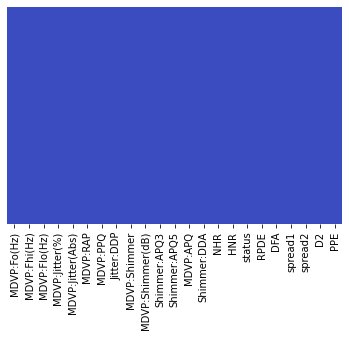

In [43]:
#CHECKING FOR MISSING VALUES AND REPRESENTING IT USING HEAT MAPS
sns.heatmap(df.isnull(),cmap='coolwarm',xticklabels = True,yticklabels = False,cbar=False)

PREPARING x AND y

In [44]:
y = df['status']
X = df.drop(['status'],axis =1 )

In [45]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [46]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

SPLITTING DATA INTO TEST AND TRAIN

In [47]:
X_train,X_test,y_train, y_test = train_test_split( X, y ,test_size = 0.3 , random_state = 123)

BALANCING DATA FOR IMPROVING CLASSIFICATION PERFORMANCE

In [48]:
def balancing(X_train,y_train) :
    #Smote
    if( x ==1):
        #X_train, y_train = sm.fit_sample(X_train, y_train.values.ravel())
        X_train, y_train = sm.fit_sample(X_train, y_train)
        
    #smotetomek
    elif(x ==2) :
        X_train, y_train = smk.fit_sample(X_train, y_train.values.ravel())
    else :
        print('wrong input')
    y_train = pd.DataFrame(y_train)
    X_train = pd.DataFrame(X_train)

    X_train = X_train.round(2)
    #print(X_train.head())
    return X_train,y_train

In [49]:
x = 1
X_train,y_train = balancing(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


RENAMING THE COLUMNS FOR BETTER UNDERSTANDING AND READIBILITY

In [50]:
    X_train = X_train.rename(columns={0:'id',1:'MDVP:Fo(Hz)',2:'MDVP:Fhi(Hz)',3:'MDVP:Flo(Hz)',4:'MDVP:Jitter(%)',5
                       :'MDVP:Jitter(Abs)',6:'MDVP:RAP',7:'MDVP:PPQ',8:'Jitter:DDP',9:'MDVP:Shimmer',
                                      10:'MDVP:Shimmer(dB)',11:'Shimmer:APQ3',12:'Shimmer:APQ5',
                                      13:'MDVP:APQ',14:'Shimmer:DDA',15:'NHR',16:'HNR',
                                      17:'RPDE',18:'DFA',19:'spread1',20:'spread2',21:
                                     'D2', 22:'PPE'})
    y_train = y_train.rename(columns={0:'status'})

In [51]:
y_train['status'].value_counts()

1    104
0    104
Name: status, dtype: int64

STANDARDIZING THE MULTIVARIATE DATA 

In [52]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

APPLYING MACHINE LEARNING ALGORITHMS 

In [19]:
#support vector classifier
svc_model = SVC(class_weight ='balanced',probability = True)
svc_model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [20]:
svc_predictions = svc_model.predict(X_test)
print(accuracy_score(y_test,svc_predictions))

0.7627118644067796


In [21]:
print(classification_report(y_test,svc_predictions))
print(confusion_matrix(y_test,svc_predictions))

              precision    recall  f1-score   support

           0       0.54      0.81      0.65        16
           1       0.91      0.74      0.82        43

    accuracy                           0.76        59
   macro avg       0.73      0.78      0.74        59
weighted avg       0.81      0.76      0.77        59

[[13  3]
 [11 32]]


In [22]:
svc_score = cross_val_score(estimator = svc_model , X = X_train , y = y_train,cv = 5)
print(svc_score.mean())

0.8799070847851336


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [24]:
#NAIVE BAYES
nb = GaussianNB()
nb.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [26]:
nb_predictions = nb.predict(X_test)
print(accuracy_score(y_test,nb_predictions))

0.6101694915254238


In [27]:
print(classification_report(y_test,nb_predictions))
print(confusion_matrix(y_test,nb_predictions))

              precision    recall  f1-score   support

           0       0.41      1.00      0.58        16
           1       1.00      0.47      0.63        43

    accuracy                           0.61        59
   macro avg       0.71      0.73      0.61        59
weighted avg       0.84      0.61      0.62        59

[[16  0]
 [23 20]]


In [28]:
#LOGISTIC REGRESSION
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
logreg_predictions = logreg.predict(X_test)
print(accuracy_score(y_test,logreg_predictions))

0.8305084745762712


In [30]:
print(classification_report(y_test,logreg_predictions))
print(confusion_matrix(y_test,logreg_predictions))

              precision    recall  f1-score   support

           0       0.62      0.94      0.75        16
           1       0.97      0.79      0.87        43

    accuracy                           0.83        59
   macro avg       0.80      0.86      0.81        59
weighted avg       0.88      0.83      0.84        59

[[15  1]
 [ 9 34]]


In [31]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators =10 )
rfc.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
rfc_predictions = rfc.predict(X_test)
print(accuracy_score(y_test,rfc_predictions))

0.8135593220338984


In [33]:
print(classification_report(y_test,rfc_predictions))
print(confusion_matrix(y_test,rfc_predictions))

              precision    recall  f1-score   support

           0       0.60      0.94      0.73        16
           1       0.97      0.77      0.86        43

    accuracy                           0.81        59
   macro avg       0.79      0.85      0.79        59
weighted avg       0.87      0.81      0.82        59

[[15  1]
 [10 33]]


In [34]:
rfc_score = cross_val_score(estimator = rfc , X = X_train , y = y_train,cv =5)
print(rfc_score.mean())

0.9186991869918699


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

In [35]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [36]:
predictions = model.predict(X_test)
print(accuracy_score(y_test,predictions))

0.9152542372881356


In [37]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.95      0.93      0.94        43

    accuracy                           0.92        59
   macro avg       0.89      0.90      0.89        59
weighted avg       0.92      0.92      0.92        59

[[14  2]
 [ 3 40]]


In [54]:
score = cross_val_score(estimator = model , X = X_train , y = y_train,cv =5)
print(score.mean())

0.9328687572590011


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**INFERENCE: Considering the accuracy scores and cross validation scores of various predictions over the same pre processed data, our proposed algorithm , XGBoost comes out as the winner**

**CONCLUSION:XGBOOST has given promising results in terms of early prediction on Parkinson's disease and can be explored furthur in order to making a feasible model for medical application**

---



---


**As tested in this project,
XGBoost with its ability to predict the disease at an early
stage could change lives of many, paving the way for a
better life for one and all**